In [23]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder 
import os
import pandas as pd
import numpy as np

In [24]:
TRAIN_DIR='images/train'
TEST_DIR='images/test'

In [25]:
def frame(dir):
    paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return paths,labels

In [26]:
train=pd.DataFrame()
train['image'],train['label']=frame(TRAIN_DIR)
test=pd.DataFrame()
test['image'],test['label']=frame(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [27]:
print(train)
print(test)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]
                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\983

In [28]:
 def extract(images):
     features=[]
     for image in tqdm(images):
         img = load_img(image, color_mode="grayscale")
         img = np.array(img)
         features.append(img)
     features=np.array(features)
     features=features.reshape(len(features),48,48,1)
     return features

In [29]:
train_features=extract(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [15]:
test_features=extract(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [16]:
x_train=train_features/255.0
x_test=test_features/255.0

In [31]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [32]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [34]:
y_train=to_categorical(y_train,num_classes= 7)
y_test=to_categorical(y_test,num_classes= 7)

In [42]:
model= Sequential()
# convolutional layer
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [45]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [49]:
model.fit(x = x_train,y = y_train, batch_size = 128, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 178s 770ms/step - accuracy: 0.2369 - loss: 1.8351 - val_accuracy: 0.2583 - val_loss: 1.8132
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 177s 784ms/step - accuracy: 0.2531 - loss: 1.8067 - val_accuracy: 0.2598 - val_loss: 1.7522
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 167s 737ms/step - accuracy: 0.2754 - loss: 1.7491 - val_accuracy: 0.3297 - val_loss: 1.6498
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 192s 850ms/step - accuracy: 0.3374 - loss: 1.6519 - val_accuracy: 0.4416 - val_loss: 1.4525
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 190s 839ms/step - accuracy: 0.4034 - loss: 1.5244 - val_accuracy: 0.4677 - val_loss: 1.4012
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 184s 815ms/step - accuracy: 0.4326 - loss: 1.4660 - val_accuracy: 0.4841 - val_loss: 1.3397
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 760ms/step - accuracy: 0.4576 - loss: 1.4076 - val_accuracy: 0.5123 - val_loss: 1.2910
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 174s 771ms/step - accuracy: 

In [56]:
model_json = model.to_json()
with open("BabyEmotion.json",'w') as json_file:
    json_file.write(model_json)
model.save('BabyEmotion.h5')

In [57]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [58]:
def extract_features(image):
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [59]:
# to predict an individual image
def ef(image):
    img = load_img(image,color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
This is a image of  happy


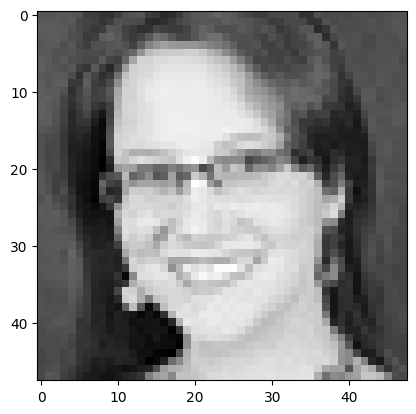

In [62]:
# to show the predicted image 
image="images/train/happy/7.jpg"
img = ef(image)
pred = model.predict (img)
p_label = label[pred.argmax()]
print("This is a image of ",p_label)
plt.imshow(img.reshape(48,48),cmap = 'gray')